In [2]:
import vtk
import glob
from vtk.util.numpy_support import vtk_to_numpy
import pandas as pd 
import numpy as np

def label_np(data):
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(data)
    reader.Update()
    polydata=reader.GetOutput()
    curvatureFilter = vtk.vtkCurvatures()
    curvatureFilter.SetInputData(polydata)
    curvatureFilter.SetCurvatureTypeToMinimum()
    curvatureFilter.SetCurvatureTypeToMaximum()
    curvatureFilter.SetCurvatureTypeToGaussian()
    curvatureFilter.SetCurvatureTypeToMean()
    curvatureFilter.Update()
    curvature = curvatureFilter.GetOutput()
    label_np = vtk_to_numpy(curvature.GetPointData().GetArray(0))
    return label_np


def make_ptnumpy (data):
    pointcloud=np.empty((1,3))

    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(data)
    reader.Update()
    polydata = reader.GetOutput()
    pt = vtk_to_numpy(polydata.GetPoints().GetData())

    return pt

In [27]:
label=label_np(r'\\192.168.0.113\Imagoworks\Data\confident\Mesh\IntraoralScan\DDH\test\1\137.vtp')
point=make_ptnumpy(r'\\192.168.0.113\Imagoworks\Data\confident\Mesh\IntraoralScan\DDH\test\1\137.vtp')

print(label)
print(point)

[ 0  0  0 ... 15 15 15]
[[-31.805584  18.483227   9.924537]
 [-31.952385  18.761131   9.972741]
 [-31.973122  18.482256   9.839977]
 ...
 [ 27.52172   17.265732  12.164439]
 [ 27.637821  16.872997  12.084219]
 [ 27.27784   17.42236   12.329577]]


In [43]:
data1=data[data['label']>0]
data1['label'].unique()

TypeError: unique() got an unexpected keyword argument 'ascending'

In [32]:
point=pd.DataFrame(point)
point.columns=['x','y','z']
label=pd.DataFrame(label)
label.columns=['label']
data=pd.concat([label,point],axis=1)


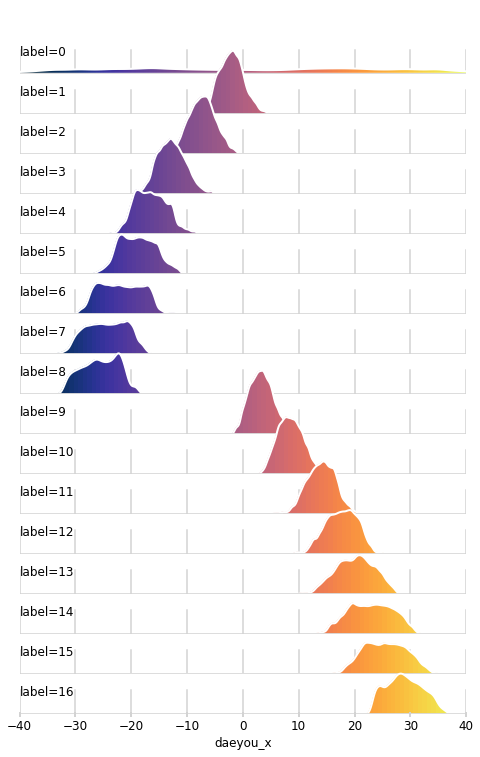

In [35]:
#포인터별 ridgedline 그리기 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns

df=pd.read_csv(r'C:\Users\imagoworks-moongzeee\test\ml_preprocessing4.csv')

Daeyou=df['cat']=='daeyou'
Daeyou_cut=df['cat']=='daeyou_cut'
ddh=df['cat']=='ddh'
ddh_cut=df['cat']=='ddh_cut'
Daeyou_df=df[Daeyou]
Daeyou_df.sort_values(by='label',ascending=True,inplace=True)
Daeyou_cut_df=df[Daeyou_cut]
Daeyou_cut_df.sort_values(by='label',ascending=True,inplace=True)
ddh_df=df[ddh]
ddh_df.sort_values(by='label',ascending=True,inplace=True)
ddh_cut_df=df[ddh_cut]
ddh_cut_df.sort_values(by='label',ascending=True,inplace=True)

import cmocean  as cmo 

fig, axs=plt.subplots(nrows=17, figsize=(8,13), sharex=True, sharey=True)
fig.set_facecolor('none')

x=np.linspace(0,1,100)

for i, ax in enumerate(axs,0):
    sns.kdeplot(Daeyou_df.query(f"label=={i}")['x'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(-40,40)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.thermal',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )

    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)


    ax.text(-40,0.05, f"label={i}",fontdict={"fontsize":"large"})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 16:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('daeyou_x', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')

fig.subplots_adjust(hspace=-0.4)

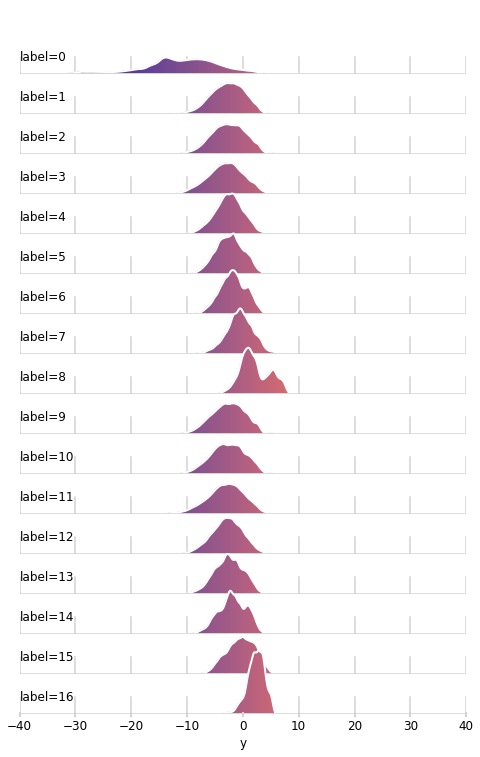

In [36]:
import cmocean  as cmo 

fig, axs=plt.subplots(nrows=17, figsize=(8,13), sharex=True, sharey=True)
fig.set_facecolor('none')

x=np.linspace(0,1,100)

for i, ax in enumerate(axs,0):
    sns.kdeplot(Daeyou_df.query(f"label=={i}")['y'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(-40,40)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.thermal',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )

    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)


    ax.text(-40,0.05, f"label={i}",fontdict={"fontsize":"large"})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 16:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('y', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')

fig.subplots_adjust(hspace=-0.4)

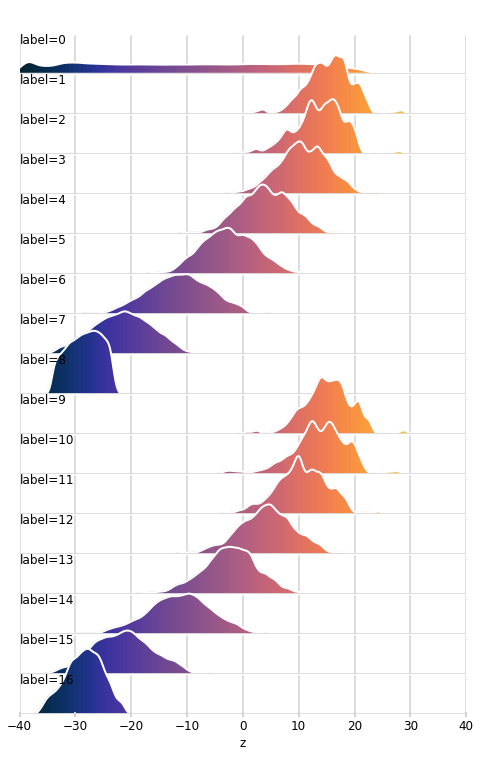

In [38]:
import cmocean  as cmo 

fig, axs=plt.subplots(nrows=17, figsize=(8,13), sharex=True, sharey=True)
fig.set_facecolor('none')

x=np.linspace(0,1,100)

for i, ax in enumerate(axs,0):
    sns.kdeplot(Daeyou_df.query(f"label=={i}")['z'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(-40,40)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.thermal',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )

    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)


    ax.text(-40,0.05, f"label={i}",fontdict={"fontsize":"large"})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 16:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('z', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')

fig.subplots_adjust(hspace=-0.4)

In [14]:
import plotly.express as px 

fig=px.scatter_3d(data,x='x',y='y',z='z',color='label')
fig.show()

In [16]:
import plotly as py
import plotly.graph_objs as go
 
 
trace=go.Scatter3d(
    x=data['x'],
    y=data['y'],
    z=data['z'],

    mode='markers',
    marker=dict(
        size=5,
        color=data['label'],
        colorscale='Viridis'
    )
    # text=[f"file: {file} <br>center: {center}" for file,center  in list(zip(tsne_df['file'],tsne_df['cat']))]
)

layout = dict(title = '')

data= [trace]
fig=dict(data=data, layout=layout)


py.offline.plot(fig, filename='prac.html')

TypeError: list indices must be integers or slices, not str